# Hello! #

I am Daniel, a 2nd year student at UNSW.
----------
The aims of this task include:

 1. Predict as accurately as possible whether the passengers had died (0) or survived (1).
 2. Clean and prepare the data appropriately.
 3. Introduce new features (feature engineering) to lift the accuracy of the model.
 4. Utilise dimensionality reduction or feature selection to reduce the model complexity, but maintain its accuracy.
![Titanic Photo][1]


  [1]: https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/325px-RMS_Titanic_3.jpg

#We first need to import the libraries into Python that we need to use.

 1. Matplotlib is a graphing interface for nice plots.
 2. Sklearn is the predictive model set we are using.
 3. Numpy and Pandas are both dataframe and array modifiers.

In [4]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rfc

import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

### Random Forests are a type of Decision Tree based modelling, where you go down each brach until you reach the end point (which is the prediction)

![Random Forest Example][1]


  [1]: http://s7.postimg.org/ik9dd7ny3/Random_Forest_Concepts_Page_3.png

###We first need to read in the two datasets (training and testing).

We first remove the column "Survived" from x, and use it later for fitting our model.

We then merge the two sets together, as we need to apply cleaning and feature engineering on both (or else they become out of sync)

In [10]:
x = pd.read_csv("Big_data_practice/data/train.csv")
x_2 = pd.read_csv("Big_data_practice/data/train.csv")
y = pd.read_csv("Big_data_practice/data/test_new.csv")
toPredict = x.pop('Survived')
data = pd.concat([x,y])

KeyError: 'Survived'

### Now, let's see what's in our data

In [3]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


##Clearly, we can see the columns Age, Fare, Cabin and Embarked have missing values.

###So, we first clean the age column.
We find the median age (after we filter out the same characterisitc data subset (ie same Pclass and Sex)), and apply it to the missing values.

In [5]:
newage = data[['Age','Pclass','Sex']].dropna()

## Get the subset data
print('Pclass 1 F = '+str(    np.median(((newage.query('Pclass == 1 and Sex == "female"')))['Age'])))
print('Pclass 2 F = '+str(    np.median(((newage.query('Pclass == 2 and Sex == "female"')))['Age'])))
print('Pclass 3 F = '+str(    np.median(((newage.query('Pclass == 3 and Sex == "female"')))['Age'])))
print('Pclass 1 M = '+str(    np.median(((newage.query('Pclass == 1 and Sex == "male"')))['Age'])))
print('Pclass 2 M = '+str(    np.median(((newage.query('Pclass == 2 and Sex == "male"')))['Age'])))
print('Pclass 3 M = '+str(    np.median(((newage.query('Pclass == 3 and Sex == "male"')))['Age'])))

## Get the subset data and fillna with median
data1 = data.query('Pclass == 1 and Sex == "female"');     data1['Age'] = data1['Age'].fillna(36)
data2 = data.query('Pclass == 2 and Sex == "female"');     data2['Age'] = data2['Age'].fillna(28)
data3 = data.query('Pclass == 3 and Sex == "female"');     data3['Age'] = data3['Age'].fillna(22)
data4 = data.query('Pclass == 1 and Sex == "male"');       data4['Age'] = data4['Age'].fillna(42)
data5 = data.query('Pclass == 2 and Sex == "male"');       data5['Age'] = data5['Age'].fillna(29.5)
data6 = data.query('Pclass == 3 and Sex == "male"');       data6['Age'] = data6['Age'].fillna(25)

## Merge all subsetted datasets and sort by PassengerID
data = pd.concat([data1,data2,data3,data4,data5,data6])

data = data.sort('PassengerId')

Pclass 1 F = 36.0
Pclass 2 F = 28.0
Pclass 3 F = 22.0
Pclass 1 M = 42.0
Pclass 2 M = 29.5
Pclass 3 M = 25.0


### Now let us do some exploratory data analysis after we have done cleaning.

In [6]:
x_2.groupby('Survived').agg({'Fare':
                                  {'Median':'median',
                                  'Mean':'mean', },
                           
                          'Sex':  {'Male':lambda x: (x == 'male').sum(),
                                  'Female':lambda x: (x == 'female').sum(), },
                             
                           'Pclass':  {'1':lambda x: (x == 1).sum(),
                                  '2':lambda x: (x == 2).sum(),
                                   '3':lambda x: (x == 3).sum(),},
                             
                        'SibSp':  {'Mean':'mean',},
                           'Parch':  {'Mean':'mean',},
                             
                           'Embarked':  {'S':lambda x: (x == 'S').sum(),
                                  'C':lambda x: (x == 'C').sum(),
                                   'Q':lambda x: (x == 'Q').sum()},
                             
                           'Age':  {'Median':'median',
                                  'Mean':'mean', },
                          }
                    )

Fare             Sex        Pclass              SibSp     Parch  \
         Median       Mean Male Female      1   2    3      Mean      Mean   
Survived                                                                     
0          10.5  22.117887  468     81     80  97  372  0.553734  0.329690   
1          26.0  48.395408  109    233    136  87  119  0.473684  0.464912   

         Embarked            Age             
                S   C   Q Median       Mean  
Survived                                     
0             427  75  47   28.0  30.626179  
1             217  93  30   28.0  28.343690

### Now, let's see some cool graphs about Age, Sex and Pclass survival rates

In [3]:
## Survival by sex
survived_sex = x_2[x_2['Survived']==1]['Sex'].value_counts()
dead_sex = x_2[x_2['Survived']==0]['Sex'].value_counts()

df = pd.DataFrame([survived_sex,dead_sex])

df.index = ['Survived','Dead']
plot_sex = df.plot(kind='bar',stacked=True, figsize=(2,4)
       , color = ['g','r'])

NameError: name 'x_2' is not defined

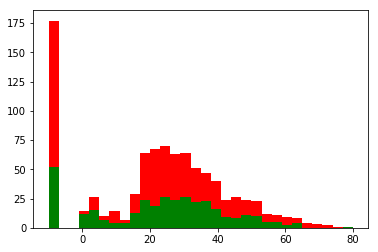

In [8]:
## Survival by Age

plot_age = plt.hist([x_2[x_2['Survived']==1]['Age'].fillna(-10),
          x_2[x_2['Survived']==0]['Age'].fillna(-10)], 
         stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])

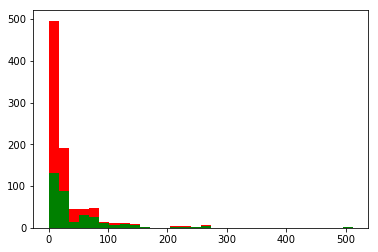

In [9]:
## Survival by Fare

plot_fare = plt.hist([x_2[x_2['Survived']==1]['Fare'].fillna(-10),
          x_2[x_2['Survived']==0]['Fare'].fillna(-10)], 
         stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])

### We can now infer the following: 

<ol>
  <li>**Pclass:**          The lower your class (3), the more likely you'll die</li>
  
  <li>**Fare:**The lower your fare, the more likely you'll die</li>
  
  <li>**Embarked**: Most of them are S, and most of them died</li>
  
  <li>**Age**: The higher your age, the more likely you'll die</li>
  
  <li>**SibSp** (Siblings, Spouse): The more you have the more likely you'll die</li>
  
  <li>**Sex**: If you are a male, you have the more likely you'll die</li>
  
  <li>**Parch** (Parents, Children): The less you have the more likely you'll die</li>
</ol>


<h3>After we know the main features of the data, we know have to clean more data or include new features. </h3>


----------
<h1> TIME FOR FEATURE ENGINEERING AND MORE CLEANING!!! </h1>
![Feature Engineering][1]


  [1]: http://3.bp.blogspot.com/-v7RCgnSNLfA/U5stfq5zuJI/AAAAAAAADt4/9_87WaSa620/s1600/features-in-ML.jpg

<h3>Now, we find which person has a missing fare value </h3>

In [10]:
u = y[y.Fare.isnull()]
print(u)

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


<h3> Now, we subset the data to find the best median fare for that missing. </h3>

In [11]:
print(np.median((x.query('Pclass == 3 and Sex == "male" and Age >= 50' ))['Fare']))
data['Fare'] = data['Fare'].fillna(7.75)

7.75


<h3>Then, we fill the missing Cabin values with "MISSING", and we also filled Embarked with "S" (highest frequency) </h3>

In [12]:
data['Cabin']=data['Cabin'].fillna('Missing')
data['Embarked']=data['Embarked'].fillna('S')

<h3> We note how both Embarked and Sex columns are categorical in nature. We then set them to be categorical in nature, and convert them to category numbers (male = 0, female = 1 etc.)</h3>

In [13]:
data['Embarked'].value_counts()

## Set both columns to type category
data['Embarked'] = data['Embarked'].astype('category')
data['Sex'] = data['Sex'].astype('category')

## Use cat.codes method to convert categories to numerical labels
columns = data.select_dtypes(['category']).columns
data[columns] = data[columns].apply(lambda fx: fx.cat.codes)

### Now, when we inspect the column Cabin, we can see it is filled with Cabin Letters and Numbers. We will attempt to split this data into columns.

In [14]:
## Intialise two lists to input Cabin Letters (Code) and Numbers (Num)
cabinCode = []
cabinNum = []

## Loop inside Cabin names and get unique values
for row in data['Cabin'].str.split('([A-z]+)(\d+)'):
    if len(row)==1:
        cabinCode.append('Missing')
        cabinNum.append('0')
    else:
        cabinCode.append(row[1])
        cabinNum.append(row[2])
        
cabinCode = pd.Series(cabinCode).unique()
cabinNum = pd.Series(cabinNum).unique()

## Loop inside Cabin Codes and apply a cross referencing categorical conversion method
for unique in cabinCode:
    X = pd.DataFrame((data['Cabin'].str.find(unique)))
    X.columns=[unique+'place']
    data = pd.concat([data,X],1)

## Loop inside Cabin Nums and apply a cross referencing categorical conversion method
for unique in cabinNum:
    X = pd.DataFrame((data['Cabin'].str.find(unique)))
    X.columns=[unique+'num']
    data = pd.concat([data,X],1)

### Now, when we check the Names of the passengers, we see they have honorifics (Mr, Ms). We will attempt to separate this data

In [15]:
## Intialise the honorific list
honorific_list = []

## Loop inside name and get the unique honorifics
for name in (data['Name'].str.split(',')):
    honorific = (name[1].split('.'))[0]
    honorific_list.append(honorific)
    
honorUnique = pd.Series(honorific_list).unique()

## Loop inside again, and apply a cross referencing categorical conversion method
for unique in honorUnique:
    X = pd.DataFrame((data['Name'].str.find(unique)))
    X.columns=[unique+'honor']
    data = pd.concat([data,X],1)

### Now, when we investigate Tickets, we can change the data into 5 datasets:

1. Ticket Length
2. How many Dots
3. How many Dashes
4. Strings of Ticket
5. Numbers of Ticket

In [16]:
## Intiliase our 5 lists:

ticklength = []; dot_list=[]; dash_list=[]; string_list=[]; num_list=[]

## Get ticket length
for name in (data['Ticket']):
    ticklength.append(len(name))
data['tick_length']=ticklength

## Split tickets into dots, dashes, strings and numbers
ticket_split = data['Ticket'].str.split(' ')
for ticket_one in ticket_split:
    if len(ticket_one)==1:
        if ticket_one==['LINE']:
            string_length=-1
            num_length=-1
            dashes=-2
            dots=-2
        else:
            string_length=0
            num_length=(len(str(ticket_one[0])))
            dashes=-2
            dots=-2
    else:
        string_length=(len(ticket_one[0]))
        num_length=(len(str(ticket_one[1])))
        dashes=(ticket_one[0].find('/'))
        dots=(ticket_one[0].find('.'))
    dot_list.append(dots)
    dash_list.append(dashes)
    string_list.append(string_length)
    num_list.append(num_length)

## Combine the datasets onto the main data:
add_on = pd.concat([pd.DataFrame(dot_list),pd.DataFrame(dash_list),pd.DataFrame(string_list),
           pd.DataFrame(num_list)],1)
add_on.columns=['dot_list','dash_list','string_list','num_list']
t = data.pop('Ticket')

### Now, we reset our data by sorting by PassengerId and add the Ticket data onto it

In [17]:
data.reset_index(inplace=True)
data=pd.concat([data,add_on],1)

### Now, we can add 3 more features:

1. Family Size
2. Fare per family member
3. Length of ticket data once aggregated.

In [18]:
data['Family_size']=data['SibSp']+data['Parch']

data['Fare_per']=data['Fare']/(data['Family_size']+1)

data['Length']=data['dot_list']+data['dash_list']+data['string_list']+data['num_list']

### We then delete columns "Index" and "Level 0" for cleaning and other columns

In [19]:
i = data.pop('index')
c = data.pop('Cabin')
n = data.pop('Name')

# AND WE ARE DONE FOR FEATURE ENGINEERING!

----------
### Now, we need to test the training set, and build our model.
![Model building][1]


  [1]: https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAk3AAAAJDBiZGU1OWZiLWIzZWMtNDU0ZC04NTEwLWY5OWM2ZDc5NGYwMA.png

### We first split the data into training and testing sets.

In [20]:
x_train = data[0:891]

y_test = data[891:]

## Place into arrays for better processing
x_train = np.array(x_train)
toPredict = np.array(toPredict)
testing = np.array(y_test)

### We can now build our Random Forest Model

0.931537598204
0.8339


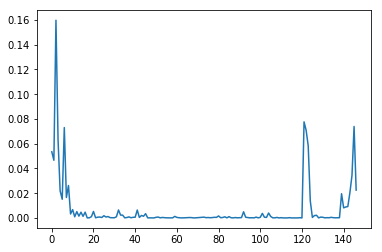

In [21]:
## Build the model:
model = rfc(n_estimators=1000,min_samples_split=10, min_samples_leaf=1, 
                max_features='auto', max_leaf_nodes=None, 
                oob_score=True, n_jobs=1, random_state=1)
model.fit(x_train,toPredict)

## Print scores:
print(model.score(x_train,toPredict))

## Plot the feature importances:
plt.plot(model.feature_importances_)

## Print out the Out Of Bag Accuracy:
print("%.4f" % model.oob_score_)

### Noticing how the training time was slow, we can see how the Random Forest automatically removed the unnecessary features (by making them to 0).


----------
### So no need for us to do dimensionality reduction!

### Now, to optimise our model to increase the OOB score or Out Of Bag Score, we will iterate through these 3 parameters: n_estimators, sample splits and leaves

***Let us first iterate the n_estimators:***

In [22]:
## Initialise vectors for iteration:

n_est = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1500, 2000, 2500, 3000]

for n_e in n_est:
    model = rfc(n_estimators=n_e,min_samples_split=10, min_samples_leaf=1, 
                max_features='auto', max_leaf_nodes=None, 
                oob_score=True, n_jobs=1, random_state=1)
    model.fit(x_train,toPredict)
    print(str(n_e)+' : '+str(model.oob_score_))

500 : 0.826038159371
600 : 0.83164983165
700 : 0.832772166105
800 : 0.835016835017
900 : 0.832772166105
1000 : 0.833894500561
1100 : 0.836139169473
1200 : 0.836139169473
1500 : 0.836139169473
2000 : 0.837261503928
2500 : 0.833894500561
3000 : 0.833894500561


### Fascinatingly enough, we see the OOB score is greatest at around 2000 iterations.

We will now attempt to iterate around 2000 to see if it improves.

In [23]:
## Initialise vectors for iteration:

n_est = [1600, 1700, 1800, 1900, 2100, 2200, 2300, 2400]

for n_e in n_est:
    model = rfc(n_estimators=n_e,min_samples_split=10, min_samples_leaf=1, 
                max_features='auto', max_leaf_nodes=None, 
                oob_score=True, n_jobs=1, random_state=1)
    model.fit(x_train,toPredict)
    print(str(n_e)+' : '+str(model.oob_score_))

1600 : 0.835016835017
1700 : 0.836139169473
1800 : 0.837261503928
1900 : 0.837261503928
2100 : 0.837261503928
2200 : 0.838383838384
2300 : 0.835016835017
2400 : 0.832772166105


### Great! Around 2200 it increases! Let's do it once more time around 2200:

In [24]:
## Initialise vectors for iteration:

n_est = [2110, 2120, 2130, 2140, 2150, 2160, 2170, 2180, 2190, 2210, 2220, 2230, 2240, 2250, 2260]

for n_e in n_est:
    model = rfc(n_estimators=n_e,min_samples_split=10, min_samples_leaf=1, 
                max_features='auto', max_leaf_nodes=None, 
                oob_score=True, n_jobs=1, random_state=1)
    model.fit(x_train,toPredict)
    print(str(n_e)+' : '+str(model.oob_score_))

2110 : 0.837261503928
2120 : 0.838383838384
2130 : 0.837261503928
2140 : 0.838383838384
2150 : 0.837261503928
2160 : 0.836139169473
2170 : 0.837261503928
2180 : 0.838383838384
2190 : 0.838383838384
2210 : 0.837261503928
2220 : 0.836139169473
2230 : 0.833894500561
2240 : 0.837261503928
2250 : 0.835016835017
2260 : 0.836139169473


### We see no change. We will leave it at 2200.

### Let's iterate through Sample Splits now, by using the same method (LOL i think this is a from of Gradient Descent, though using guessing)

![Newton's Method][1]


  [1]: https://i.stack.imgur.com/ac9O7.png

In [25]:
for n_e in range(2,20):
    model = rfc(n_estimators=2200,min_samples_split=n_e, min_samples_leaf=1, 
                max_features='auto', max_leaf_nodes=None, 
                oob_score=True, n_jobs=1, random_state=1)
    model.fit(x_train,toPredict)
    print(str(n_e)+' : '+str(model.oob_score_))

2 : 0.835016835017
3 : 0.835016835017
4 : 0.837261503928
5 : 0.836139169473
6 : 0.833894500561
7 : 0.836139169473
8 : 0.836139169473
9 : 0.835016835017
10 : 0.838383838384
11 : 0.836139169473
12 : 0.83164983165
13 : 0.83164983165
14 : 0.830527497194
15 : 0.829405162738
16 : 0.824915824916
17 : 0.829405162738
18 : 0.827160493827
19 : 0.821548821549


### We can see it stops increasing at 10, so I leave it there at 10.

### Finally, we need to check leaf splits:

In [26]:
for n_e in range(1,20):
    model = rfc(n_estimators=2200,min_samples_split=10, min_samples_leaf=n_e, 
                max_features='auto', max_leaf_nodes=None, 
                oob_score=True, n_jobs=1, random_state=1)
    model.fit(x_train,toPredict)
    print(str(n_e)+' : '+str(model.oob_score_))

1 : 0.838383838384
2 : 0.822671156004
3 : 0.822671156004
4 : 0.81593714927
5 : 0.814814814815
6 : 0.81593714927
7 : 0.812570145903
8 : 0.808080808081
9 : 0.811447811448
10 : 0.809203142536
11 : 0.810325476992
12 : 0.810325476992
13 : 0.803591470258
14 : 0.808080808081
15 : 0.803591470258
16 : 0.804713804714
17 : 0.801346801347
18 : 0.800224466891
19 : 0.802469135802


### Once again, no change. We'll leave it at 1 split.

### YAY! Now let's predict our testing data!


----------
![Test][1]


  [1]: https://lh4.ggpht.com/wKrDLLmmxjfRG2-E-k5L5BUuHWpCOe4lWRF7oVs1Gzdn5e5yvr8fj-ORTlBF43U47yI=w300

### We use the predict function and then publish the test results!

In [27]:
## Make final model
model = rfc(n_estimators=2200,min_samples_split=10, min_samples_leaf=1, 
                max_features='auto', max_leaf_nodes=None, 
                oob_score=True, n_jobs=1, random_state=1)
model.fit(x_train,toPredict)
    
## Predict!
h = model.predict(testing)
Results = pd.concat([y['PassengerId'],pd.DataFrame(h)],1)

Results.columns=['PassengerId','Survived']
Results.set_index('PassengerId')

Results.to_csv('new.csv',sep=',',index=False)

# And we're done!

### Note I got an accuracy of 80.383%. Not bad for my first data set I guess. I did 43 revisions LOL. Testing different models and increasing or deleting features.

----------

#Conclusion
Feature engineering is very important if you want to boost your scores.
Data cleaning is a very important step, as real world data is also messy.
Random Forests are very useful, especially after you optimise them.
Breaking down the problem is very important.
If you fail, keep trying. You'll eventually get it :)

### I am also writing a Kaggle Keras Model for the Titanic Data.

## Anyways, thanks a lot!
![Thanks][1]


  [1]: http://www.clipartkid.com/images/91/thanks-clipart-give-thanks-thanks-for-watching-thanksgiving-thanks-kKtxd9-clipart.jpg